# Import dependencies

In [3]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
from tensorflow import keras

# Attribute Information:

| Feature                                           | Description (English)                              | Mô tả (Tiếng Việt)                                 |
|---------------------------------------------------|----------------------------------------------------|----------------------------------------------------|
| **date**                                          | time year-month-day hour:minute:second              | Thời gian năm-tháng-ngày giờ:phút:giây            |
| **Appliances**                                    | energy use in Wh                                   | Năng lượng sử dụng, đơn vị Wh                        |
| **lights**                                        | energy use of light fixtures in the house in Wh     | Năng lượng sử dụng của đèn trong nhà, đơn vị Wh      |
| **T1**                                            | Temperature in kitchen area, in Celsius             | Nhiệt độ khu vực bếp, đơn vị Celsius               |
| **RH_1**                                          | Humidity in kitchen area, in %                      | Độ ẩm khu vực bếp, đơn vị %                        |
| **T2**                                            | Temperature in living room area, in Celsius         | Nhiệt độ khu vực phòng khách, đơn vị Celsius       |
| **RH_2**                                          | Humidity in living room area, in %                  | Độ ẩm khu vực phòng khách, đơn vị %                |
| **T3**                                            | Temperature in laundry room area, in Celsius        | Nhiệt độ khu vực phòng giặt, đơn vị Celsius       |
| **RH_3**                                          | Humidity in laundry room area, in %                 | Độ ẩm khu vực phòng giặt, đơn vị %                |
| **T4**                                            | Temperature in office room, in Celsius              | Nhiệt độ khu vực phòng làm việc, đơn vị Celsius   |
| **RH_4**                                          | Humidity in office room, in %                       | Độ ẩm khu vực phòng làm việc, đơn vị %            |
| **T5**                                            | Temperature in bathroom, in Celsius                 | Nhiệt độ khu vực phòng tắm, đơn vị Celsius        |
| **RH_5**                                          | Humidity in bathroom, in %                          | Độ ẩm khu vực phòng tắm, đơn vị %                 |
| **T6**                                            | Temperature outside the building (north side), in Celsius | Nhiệt độ bên ngoài tòa nhà (phía bắc), đơn vị Celsius |
| **RH_6**                                          | Humidity outside the building (north side), in %    | Độ ẩm bên ngoài tòa nhà (phía bắc), đơn vị %      |
| **T7**                                            | Temperature in ironing room , in Celsius            | Nhiệt độ khu vực phòng là, đơn vị Celsius         |
| **RH_7**                                          | Humidity in ironing room, in %                      | Độ ẩm khu vực phòng là, đơn vị %                  |
| **T8**                                            | Temperature in teenager room 2, in Celsius          | Nhiệt độ khu vực phòng thiếu niên 2, đơn vị Celsius |
| **RH_8**                                          | Humidity in teenager room 2, in %                   | Độ ẩm khu vực phòng thiếu niên 2, đơn vị %        |
| **T9**                                            | Temperature in parents room, in Celsius             | Nhiệt độ khu vực phòng của cha mẹ, đơn vị Celsius |
| **RH_9**                                          | Humidity in parents room, in %                      | Độ ẩm khu vực phòng của cha mẹ, đơn vị %          |
| **To**                                            | Temperature outside (from Chievres weather station), in Celsius | Nhiệt độ bên ngoài (từ trạm thời tiết Chievres), đơn vị Celsius |
| **Pressure (from Chievres weather station)**       | in mm Hg                                           | Áp suất không khí, đơn vị mm Hg                                       |
| **RH_out**                                        | Humidity outside (from Chievres weather station), in % | Độ ẩm bên ngoài (từ trạm thời tiết Chievres), đơn vị % |
| **Wind speed (from Chievres weather station)**     | in m/s                                             | đơn vị m/s                                         |
| **Visibility (from Chievres weather station)**     | in km                                              | đơn vị km                                          |
| **Tdewpoint (from Chievres weather station)**      | Â°C                                                | Điểm sương, đơn vị Â°C                            |
| **rv1**                                           | Random variable 1, nondimensional                   | Biến ngẫu nhiên 1, không có đơn vị                |
| **rv2**                                           | Random variable 2, nondimensional                   | Biến ngẫu nhiên 2, không có đơn vị                |


Các biến ngẫu nhiên (random variables) thường được sử dụng trong học máy để biểu diễn các yếu tố không xác định hoặc không biết trước được trong mô hình. Các biến này có thể được thêm vào với mục đích chính sau:

- **Mô hình hóa sự không chắc chắn:** Trong nhiều trường hợp, có những yếu tố không xác định hoặc không quan sát được mà có thể ảnh hưởng đến dữ liệu. Việc thêm các biến ngẫu nhiên có thể giúp mô hình hoá những yếu tố không biết trước đó.

- **Tạo động lực cho mô hình:** Các biến ngẫu nhiên có thể cung cấp thông tin bổ sung hoặc tạo động lực cho mô hình, cải thiện khả năng dự đoán hoặc mô hình hóa.

- **Xác định mối quan hệ phức tạp:** Thêm các biến ngẫu nhiên có thể giúp xác định các mối quan hệ phức tạp giữa các biến đầu vào.

- **Giảm overfitting:** Trong machine learning, việc thêm các biến ngẫu nhiên có thể giúp giảm overfitting bằng cách tạo sự đa dạng trong dữ liệu đào tạo.

- **Xác định phân phối:** Thêm các biến ngẫu nhiên có thể giúp xác định phân phối của dữ liệu hoặc thuật toán một cách chính xác hơn.

- **Tạo dữ liệu mô phỏng:** Trong một số trường hợp, việc thêm các biến ngẫu nhiên là cần thiết để tạo dữ liệu mô phỏng, từ đó phân tích hoặc kiểm thử các mô hình một cách đầy đủ và đáng tin cậy. italicized text

# Load data

In [5]:
# Đọc dữ liệu
pd.set_option('display.max_columns', None)
df = pd.read_csv('energydata_complete.csv', encoding='utf-8', engine=None)
df

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4       RH_4  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  45.566667   
1      19.200000  44.722500  19.790000  44.790000  19.000000  45.992500   
2      19.200000  44.626667  19.790000  44.933333  18.926667  45.890000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  45.723333   
4      19.200000  44.530000  19.790000  45.000000  18.890000  45.530000   
...          ...        ...        ...        ...        ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  45.590000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  45.590000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  45.730000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  45.790000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  45.963333   

              T5       RH_5         T6       RH_6         T7       RH_7  \
0      17.166667  55.200000   7.026667  84.256667  17.200000  41.626667   
1      17.166667  55.200000   6.833333  84.063333  17.200000  41.560000   
2      17.166667  55.090000   6.560000  83.156667  17.200000  41.433333   
3      17.166667  55.090000   6.433333  83.423333  17.133333  41.290000   
4      17.200000  55.090000   6.366667  84.893333  17.200000  41.230000   
...          ...        ...        ...        ...        ...        ...   
19730  23.200000  52.400000  24.796667   1.000000  24.500000  44.500000   
19731  23.230000  52.326667  24.196667   1.000000  24.557143  44.414286   
19732  23.230000  52.266667  23.626667   1.000000  24.540000  44.400000   
19733  23.200000  52.200000  22.433333   1.000000  24.500000  44.295714   
19734  23.200000  52.200000  21.026667   1.000000  24.500000  44.054000   

            T8       RH_8         T9     RH_9      T_out  Press_mm_hg  \
0      18.2000  48.900000  17.033333  45.5300   6.600000        733.5   
1      18.2000  48.863333  17.066667  45.5600   6.483333        733.6   
2      18.2000  48.730000  17.000000  45.5000   6.366667        733.7   
3      18.1000  48.590000  17.000000  45.4000   6.250000        733.8   
4      18.1000  48.590000  17.000000  45.4000   6.133333        733.9   
...        ...        ...        ...      ...        ...          ...   
19730  24.7000  50.074000  23.200000  46.7900  22.733333        755.2   
19731  24.7000  49.790000  23.200000  46.7900  22.600000        755.2   
19732  24.7000  49.660000  23.200000  46.7900  22.466667        755.2   
19733  24.6625  49.518750  23.200000  46.8175  22.333333        755.2   
19734  24.7360  49.736000  23.200000  46.8450  22.200000        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0      92.000000   7.000000   63.000000   5.300000  13.275433  13.275433  
1      92.000000   6.666667   59.166667   5.200000  18.606195  18.606195  
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668  
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389  
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097  
...          ...        ... 

#Exploratory Data

In [6]:
# Format date time
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Tóm tắt dữ liệu
df.describe(include='all')

<ipython-input-7-c24e16c07e08>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


date    Appliances        lights            T1  \
count                 19735  19735.000000  19735.000000  19735.000000   
unique                19735           NaN           NaN           NaN   
top     2016-01-11 17:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2016-01-11 17:00:00           NaN           NaN           NaN   
last    2016-05-27 18:00:00           NaN           NaN           NaN   
mean                    NaN     97.694958      3.801875     21.686571   
std                     NaN    102.524891      7.935988      1.606066   
min                     NaN     10.000000      0.000000     16.790000   
25%                     NaN     50.000000      0.000000     20.760000   
50%                     NaN     60.000000      0.000000     21.600000   
75%                     NaN    100.000000      0.000000     22.600000   
max                     NaN   1080.000000     70.000000     26.260000   

                RH_1            T2          RH_2            T3          RH_3  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       40.259739     20.341219     40.420420     22.267611     39.242500   
std         3.979299      2.192974      4.069813      2.006111      3.254576   
min        27.023333     16.100000     20.463333     17.200000     28.766667   
25%        37.333333     18.790000     37.900000     20.790000     36.900000   
50%        39.656667     20.000000     40.500000     22.100000     38.530000   
75%        43.066667     21.500000     43.260000     23.290000     41.760000   
max        63.360000     29.856667     56.026667     29.236000     50.163333   

                  T4          RH_4            T5          RH_5            T6  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       20.855335     39.026904     19.592106     50.949283      7.910939   
std         2.042884      4.341321      1.844623      9.022034      6.090347   
min        15.100000     27.660000     15.330000     29.815000     -6.065000   
25%        19.530000     35.530000     18.277500     45.400000      3.626667   
50%        20.666667     38.400000     19.390000     49.090000      7.300000   
75%        22.100000     42.156667     20.619643     53.663333     11.256000   
max        26.200000     51.090000     25.795000     96.321667     28.290000   

                RH_6            T7          RH_7            T8          RH_8  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       54.609083     20.267106     35.388200     22.029107     42.936165   
std        31.149806      2.109993      5.114208      1.956162      5.224361   
min         1.000000     15.390000    

Nhìn qua bảng tóm tắt thì ta thấy Appliances và lights có giá trị max chênh lệch lớn so với mean. Cùng kiểu tra qua xem có gì bất ổn không.

In [8]:
df['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

Nhận xét: Phần lớn thời gian đèn không được mở (điện năng tiêu thụ bằng 0). Có 2 thời điểm điện năng đèn cao trên 50Wh. Cùng xem qua 2 thời điểm này.

In [9]:
df[df['lights'] > 40]['date']

6      2016-01-11 18:00:00
7      2016-01-11 18:10:00
10     2016-01-11 18:40:00
11     2016-01-11 18:50:00
12     2016-01-11 19:00:00
1313   2016-01-20 19:50:00
2197   2016-01-26 23:10:00
2888   2016-01-31 18:20:00
3119   2016-02-02 08:50:00
8933   2016-03-13 17:50:00
8934   2016-03-13 18:00:00
Name: date, dtype: datetime64[ns]

Nhận xét: Phần lớn thời gian tiêu thụ điện bằng đèn chiếu sang nhiều là vào buổi tối, điều này không có gì bất thường

In [10]:
pd.set_option('display.max_rows', None)
df['Appliances'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
90      1015
100      978
110      736
30       723
120      502
20       343
130      330
140      223
150      144
160       90
260       89
270       87
190       86
240       84
230       82
280       82
180       78
250       77
300       73
220       73
170       70
310       70
290       69
210       69
330       66
350       62
390       62
360       62
340       61
320       60
370       59
200       58
400       46
380       43
410       40
420       33
440       33
430       25
450       24
470       24
480       21
460       21
510       19
490       18
590       17
610       16
530       16
600       15
620       14
560       14
520       13
500       13
580       11
660       11
630       11
550       10
540       10
700        9
690        9
10         9
570        8
710        8
750        7
650        7
720        7
640        7
680        6
740        5
670        4
780        4
790        4
760        4

Xem qua thời gian năng lượng tiêu thụ cao là vào lúc nào

In [11]:
df[df['Appliances'] > 800]['date']

432     2016-01-14 17:00:00
731     2016-01-16 18:50:00
1307    2016-01-20 18:50:00
1451    2016-01-21 18:50:00
1452    2016-01-21 19:00:00
1821    2016-01-24 08:30:00
9031    2016-03-14 10:10:00
10668   2016-03-25 19:00:00
12088   2016-04-04 15:40:00
13821   2016-04-16 16:30:00
14693   2016-04-22 17:50:00
15798   2016-04-30 10:00:00
19541   2016-05-26 09:50:00
19582   2016-05-26 16:40:00
Name: date, dtype: datetime64[ns]

Nhận xét: đa số năng lượng tiêu thụ lớn là vào buổi tối, tỉ lệ với năng lượng đèn điện tiêu thụ. => Không có gì bất thường

In [12]:
# Check types
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [13]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [14]:
# Check null
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<ipython-input-15-5be5a17dcc57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


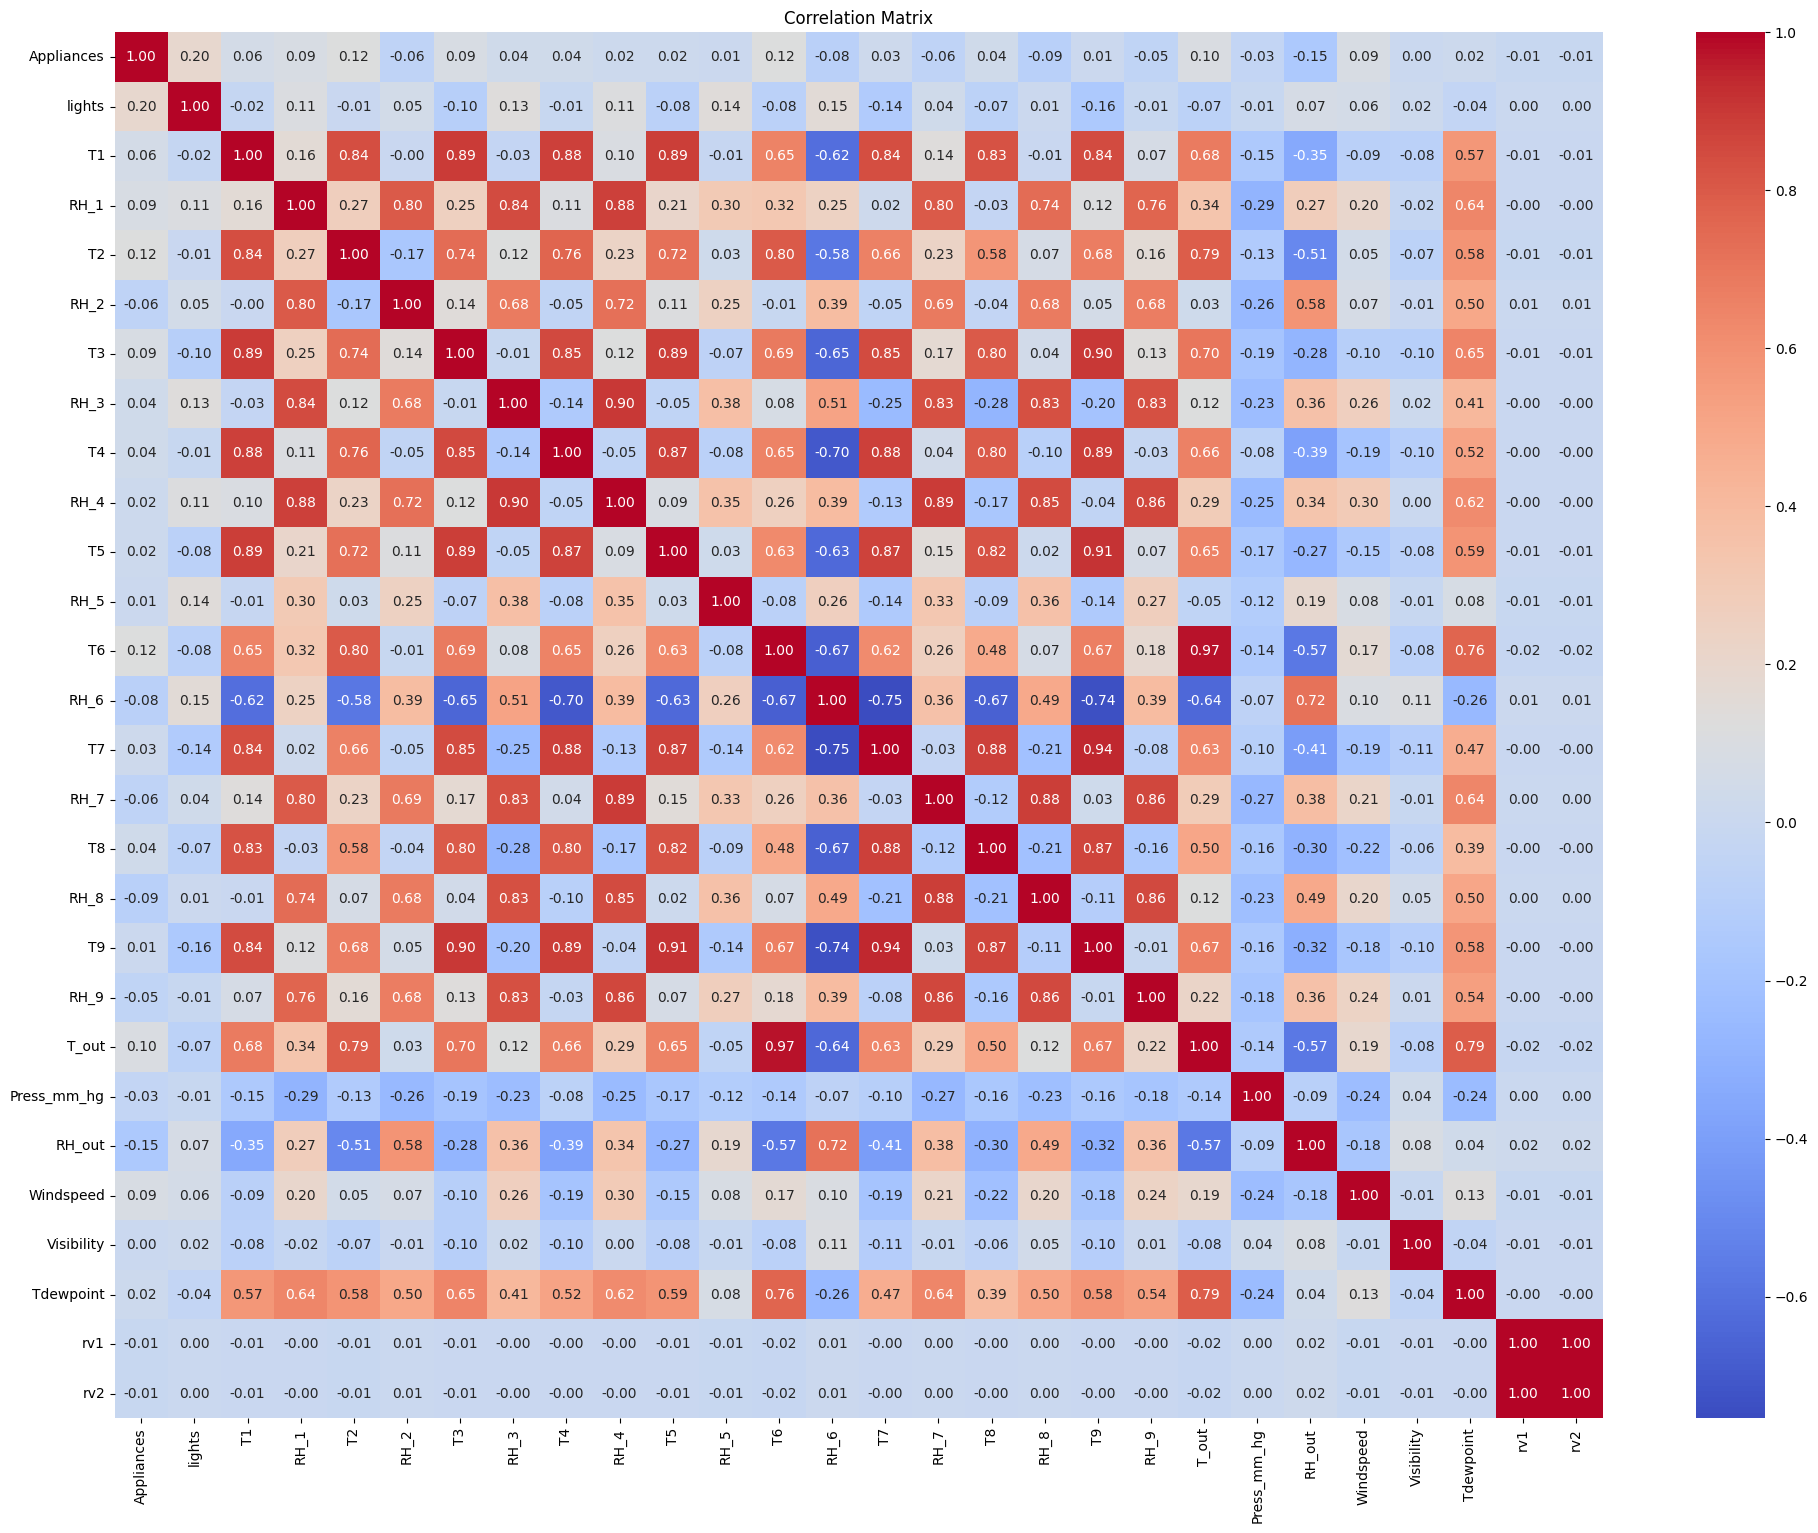

In [15]:
# Ma trận tương quan
correlation_matrix = df.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Nhận xét, ta thấy có một số features có corr cao, đặc biệt là T6 và T_out, điều này là dễ hiểu vì T6 và T_out cùng là nhiệt độ ngoài trời, chỉ khác ở vị trí đo (ngoài nhà và ở trạm đo). Với các features khác, corr khá cao nhưng vì đặc tính ở các khu phòng khác nhau nên cũng không loại bỏ các features này.

# Data Visualization

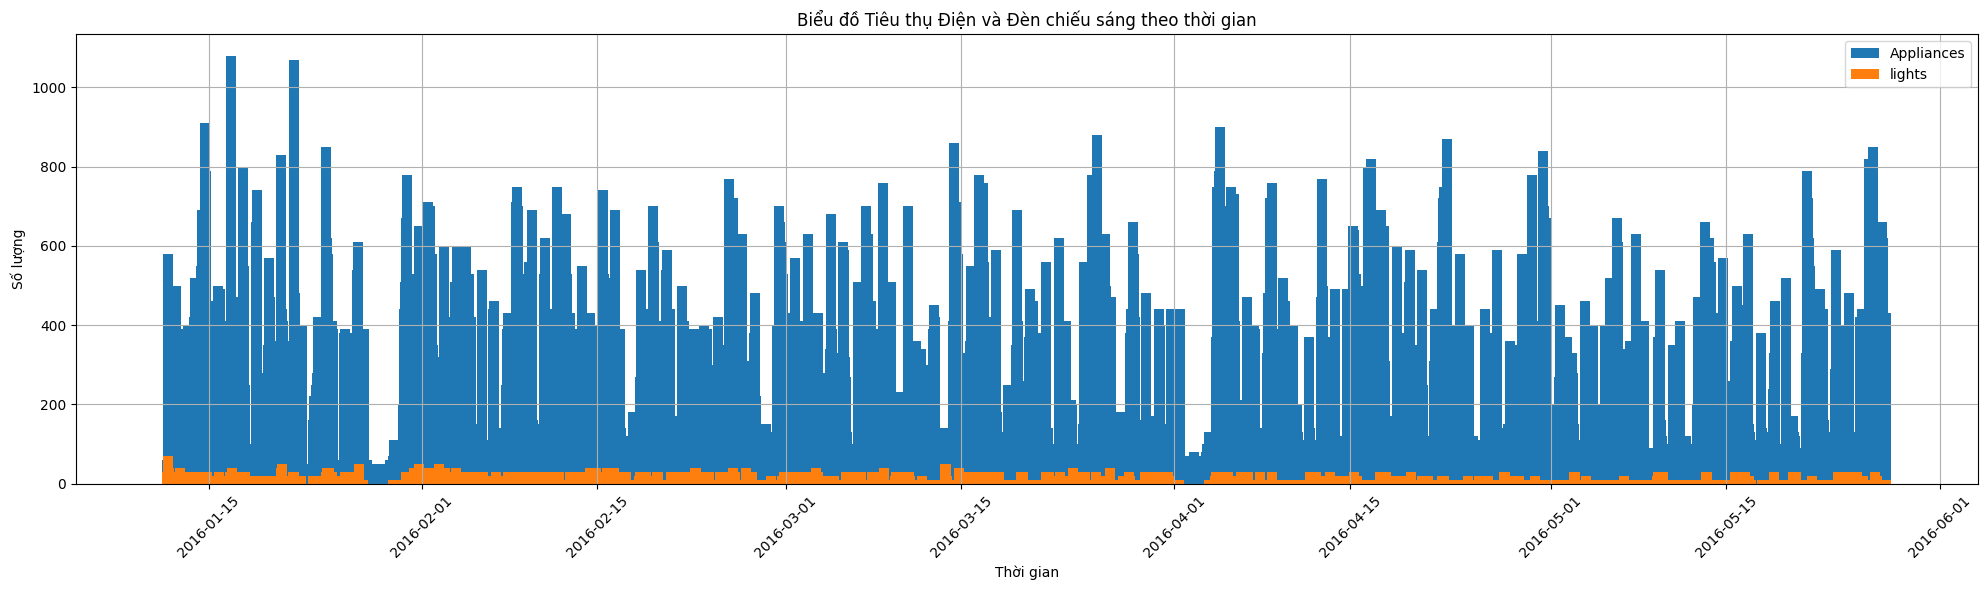

In [16]:
# Biểu đồ cột cho Appliances và lights
plt.figure(figsize=(20, 6))
plt.bar(df['date'], df['Appliances'], label='Appliances')
plt.bar(df['date'], df['lights'], label='lights')
plt.title('Biểu đồ Tiêu thụ Điện và Đèn chiếu sáng theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

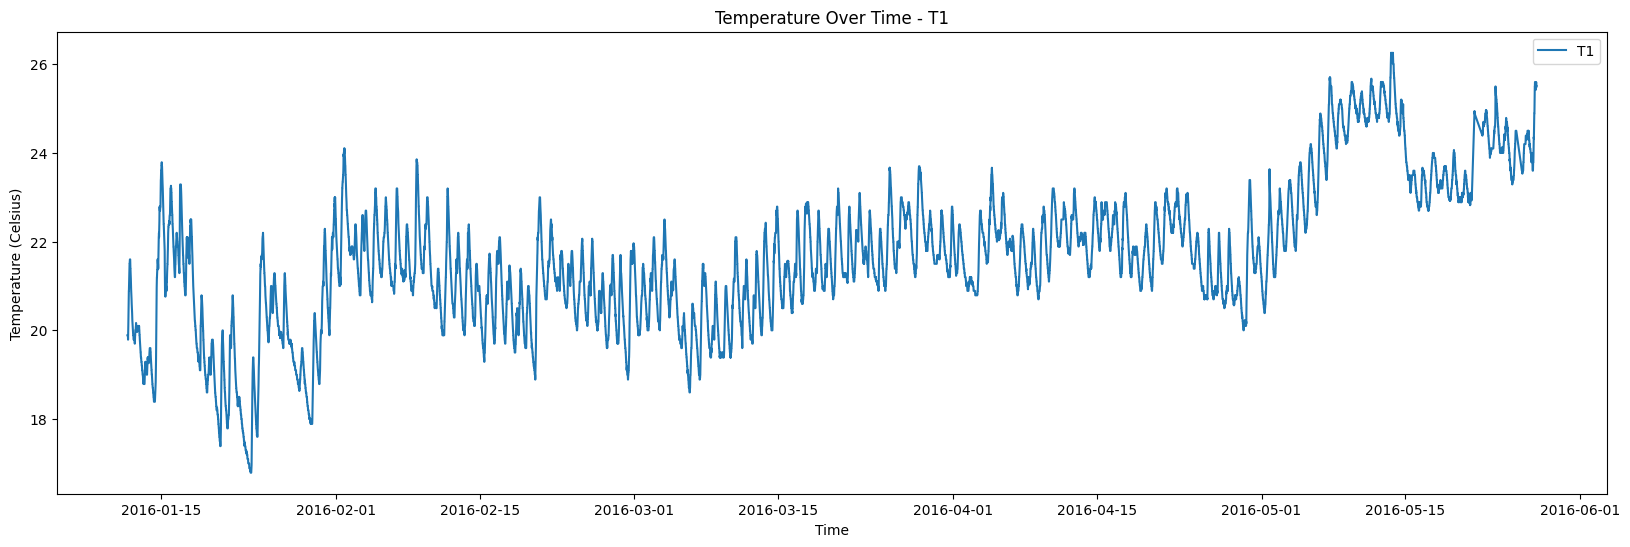

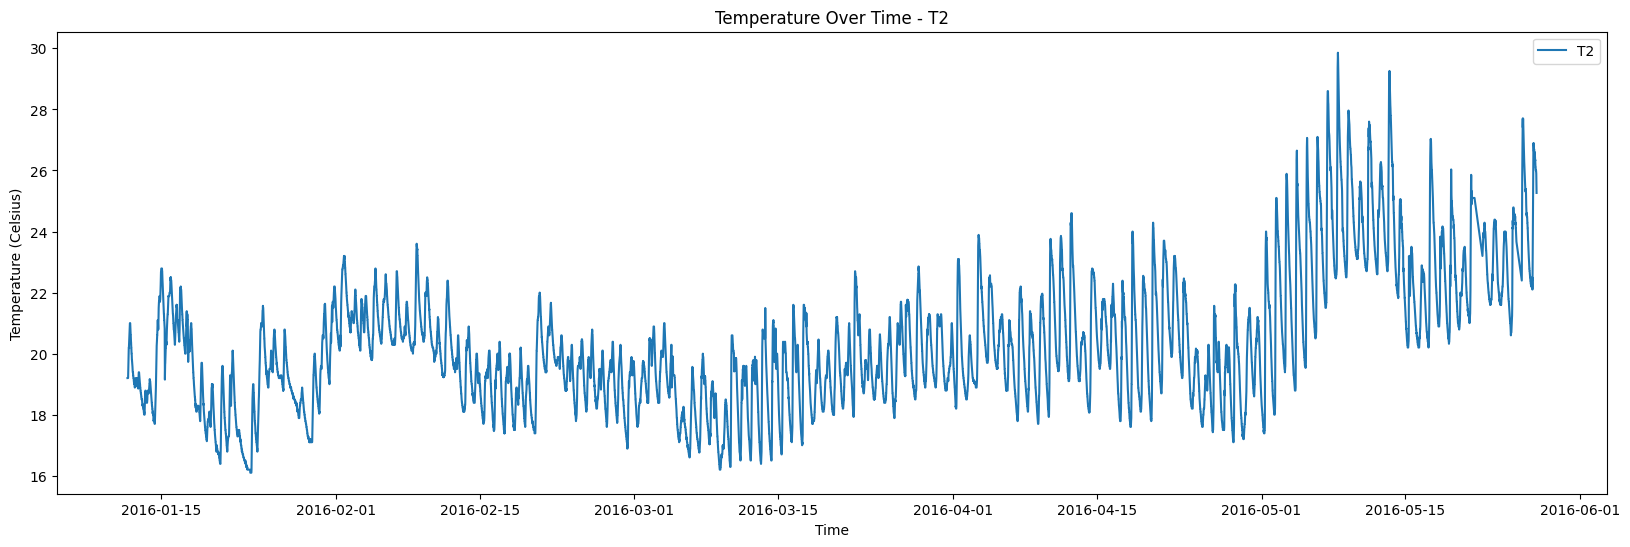

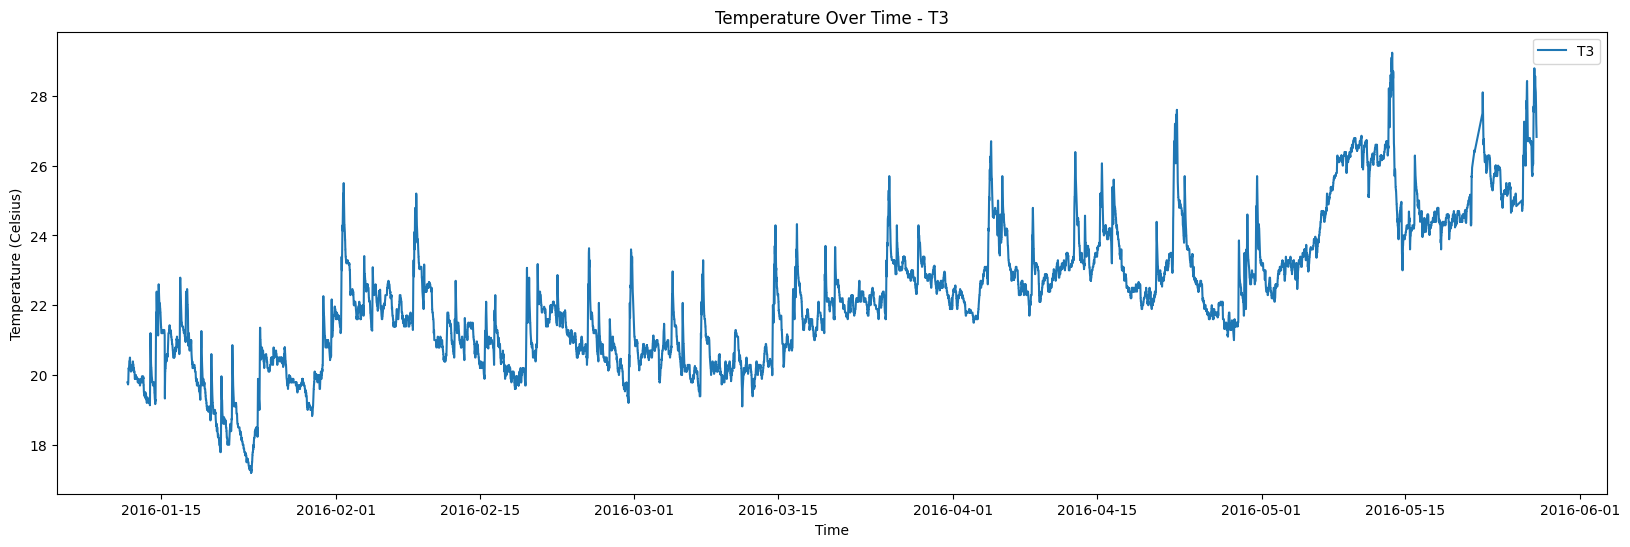

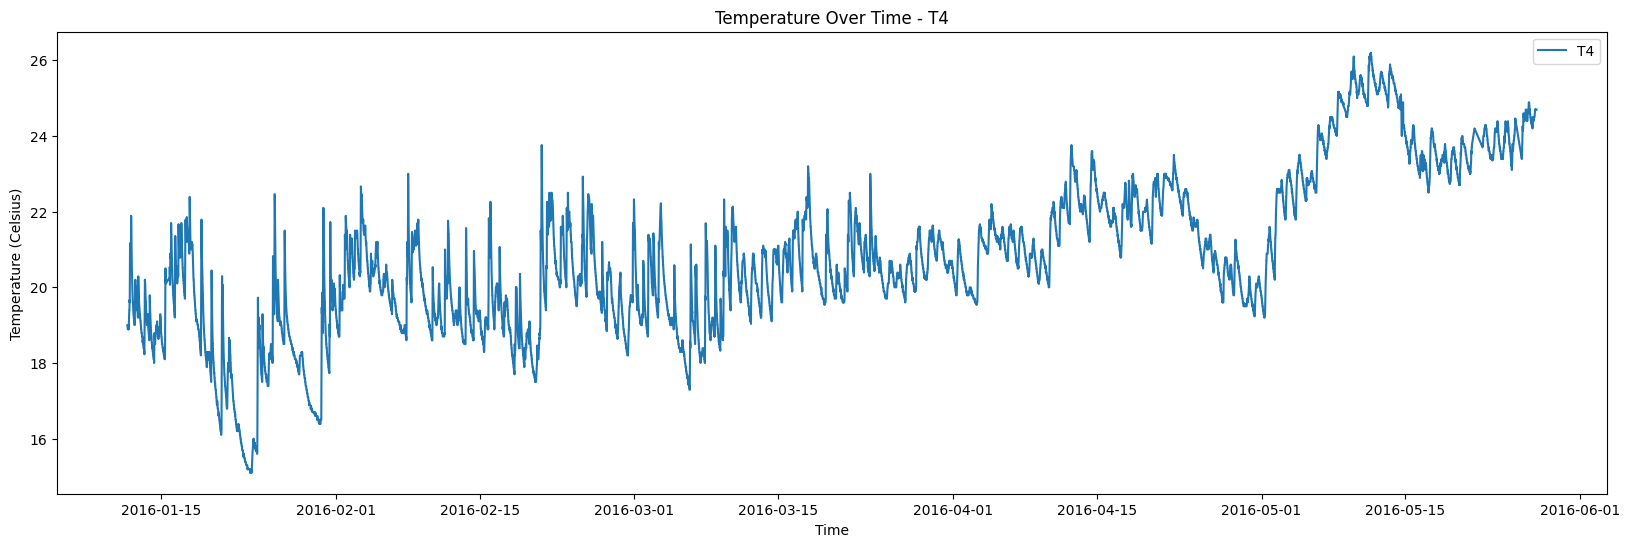

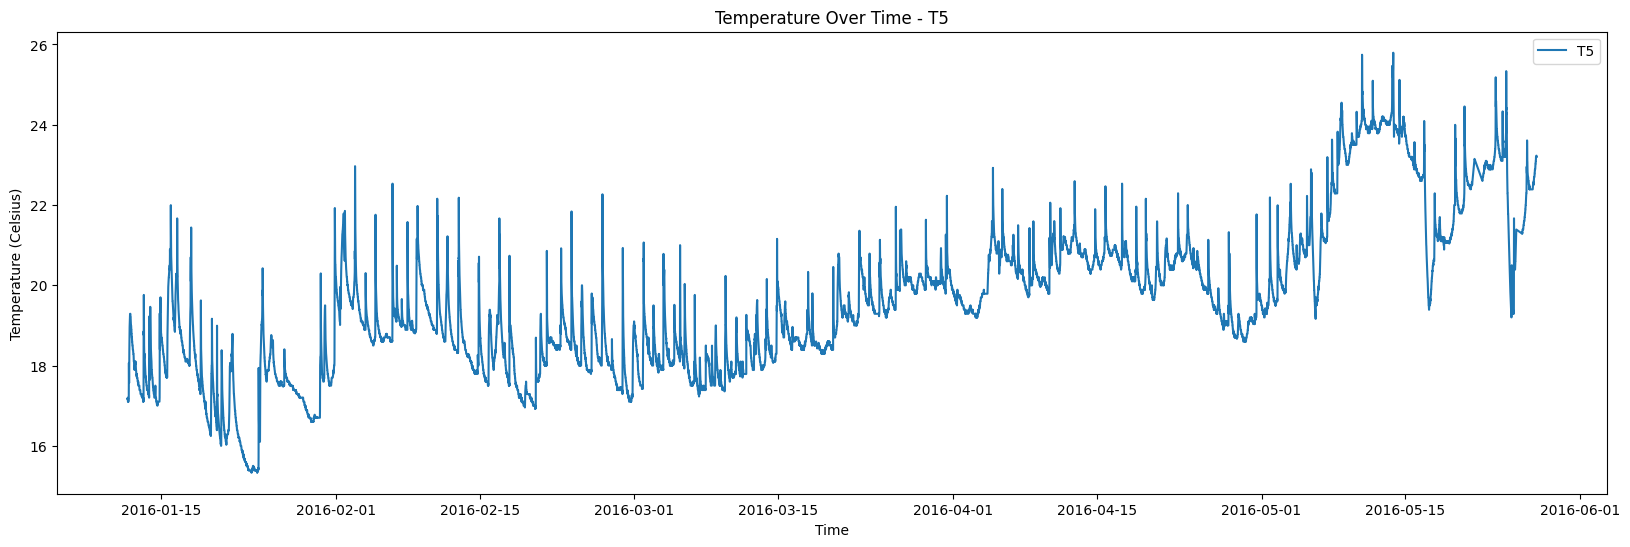

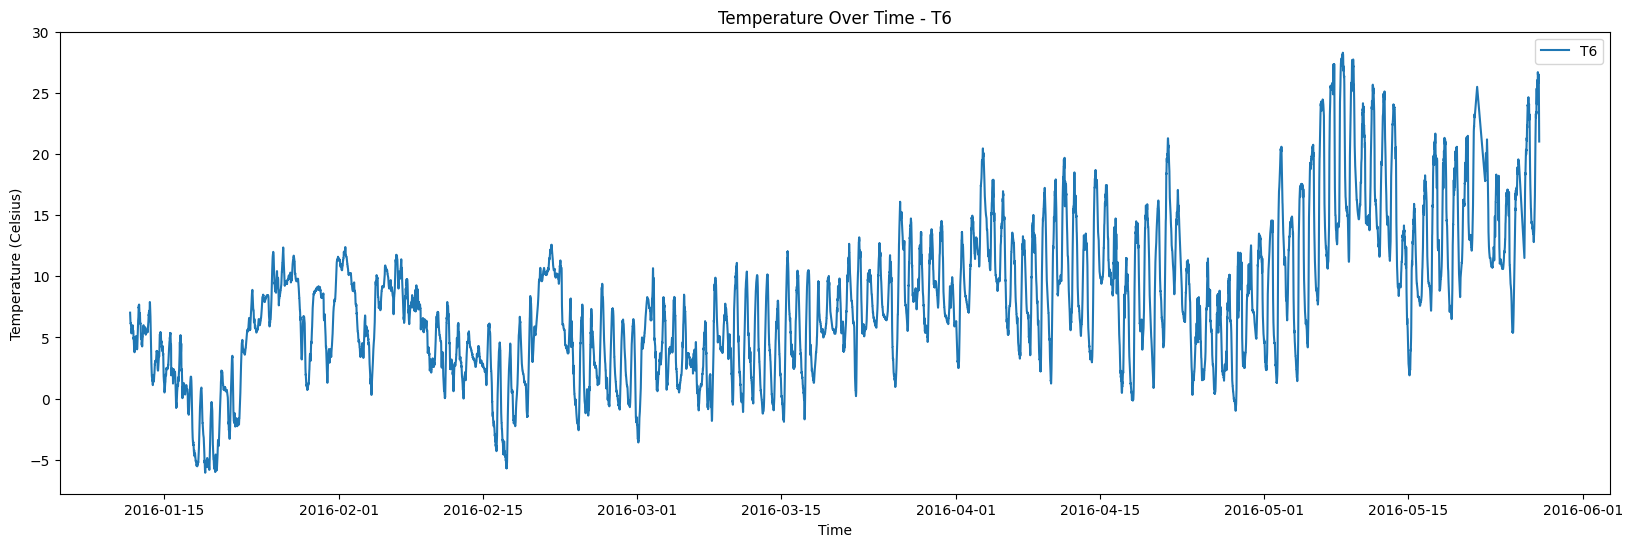

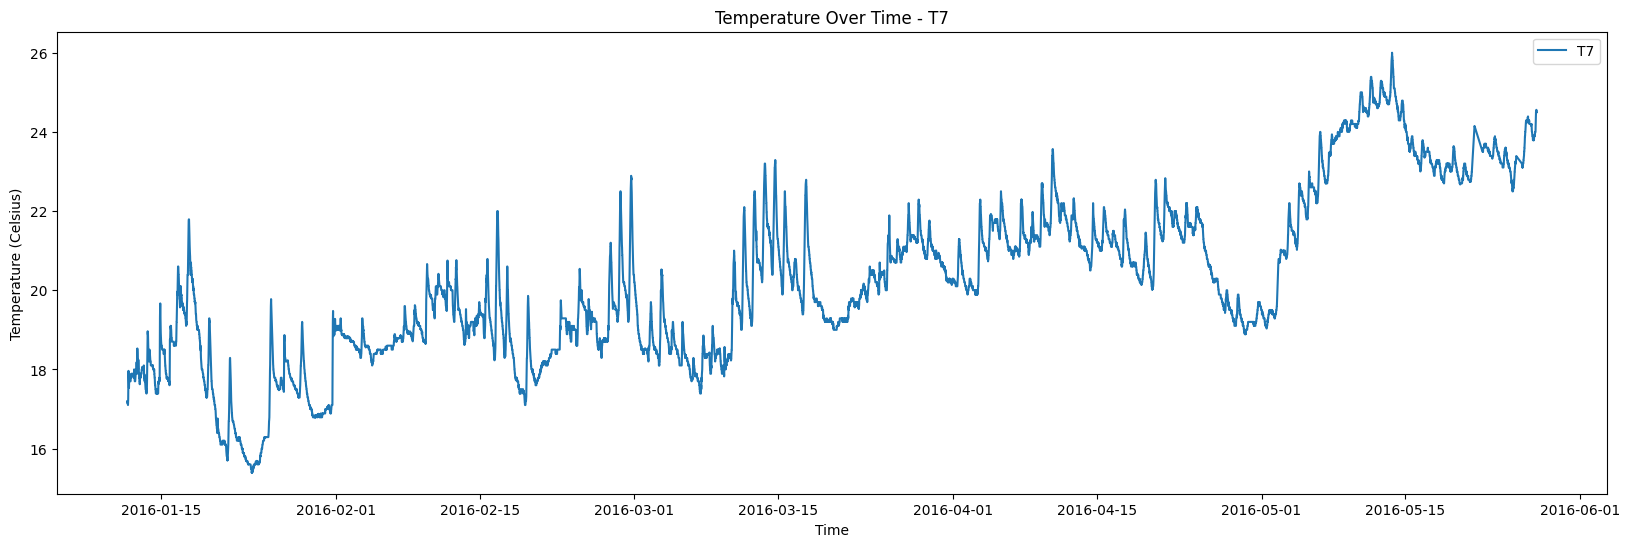

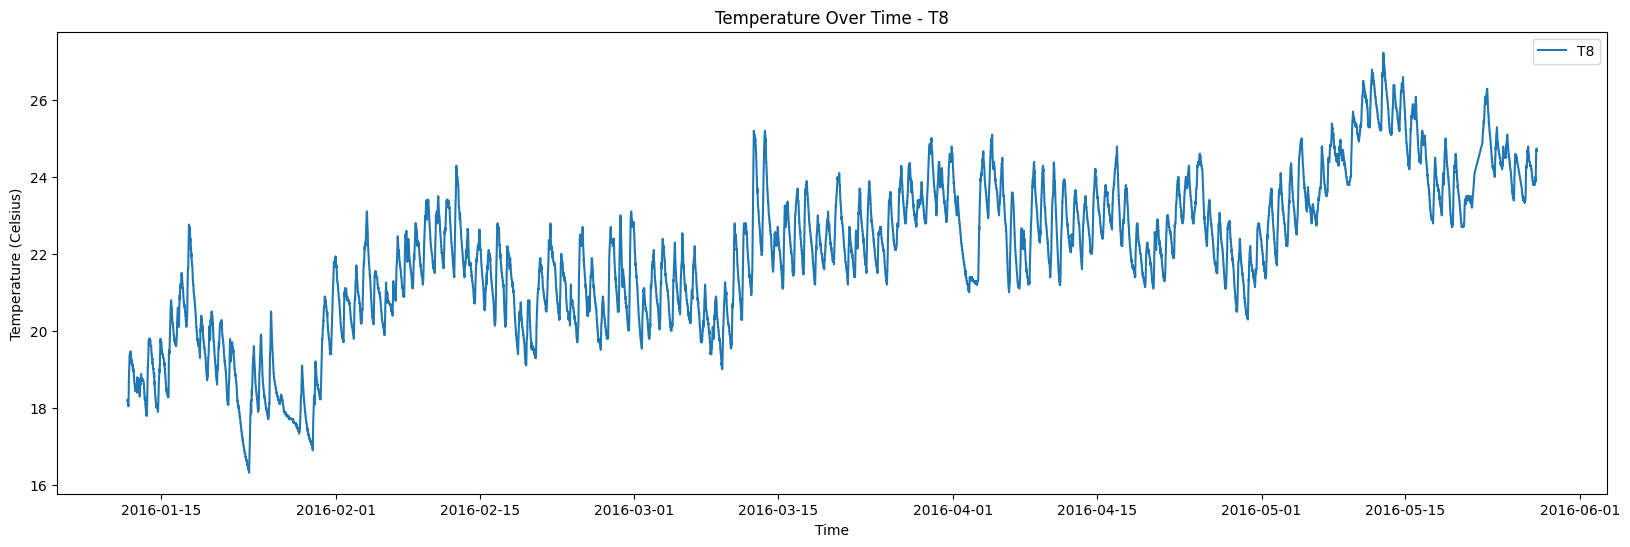

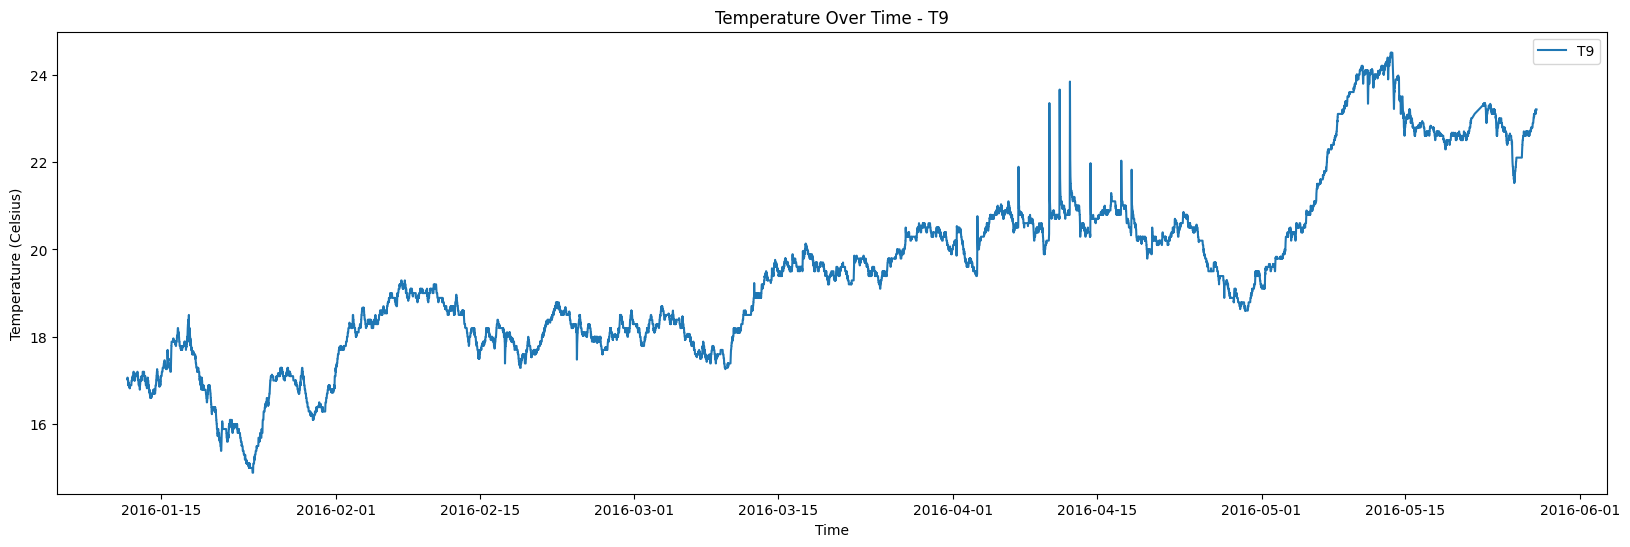

In [17]:
# Biểu đồ nhiệt độ theo thời gian
temperature_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

for column in temperature_columns:
    plt.figure(figsize=(20, 6))
    plt.plot(df['date'], df[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Temperature (Celsius)')
    plt.title(f'Temperature Over Time - {column}')
    plt.legend()
    plt.show()

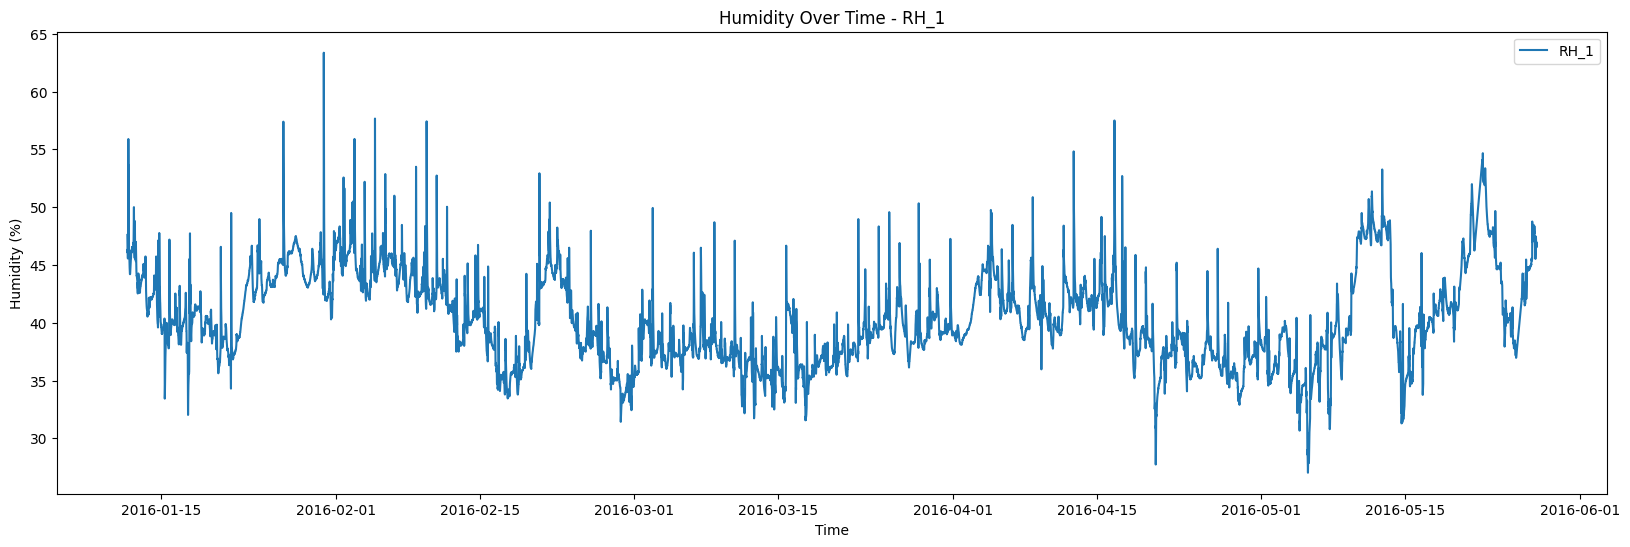

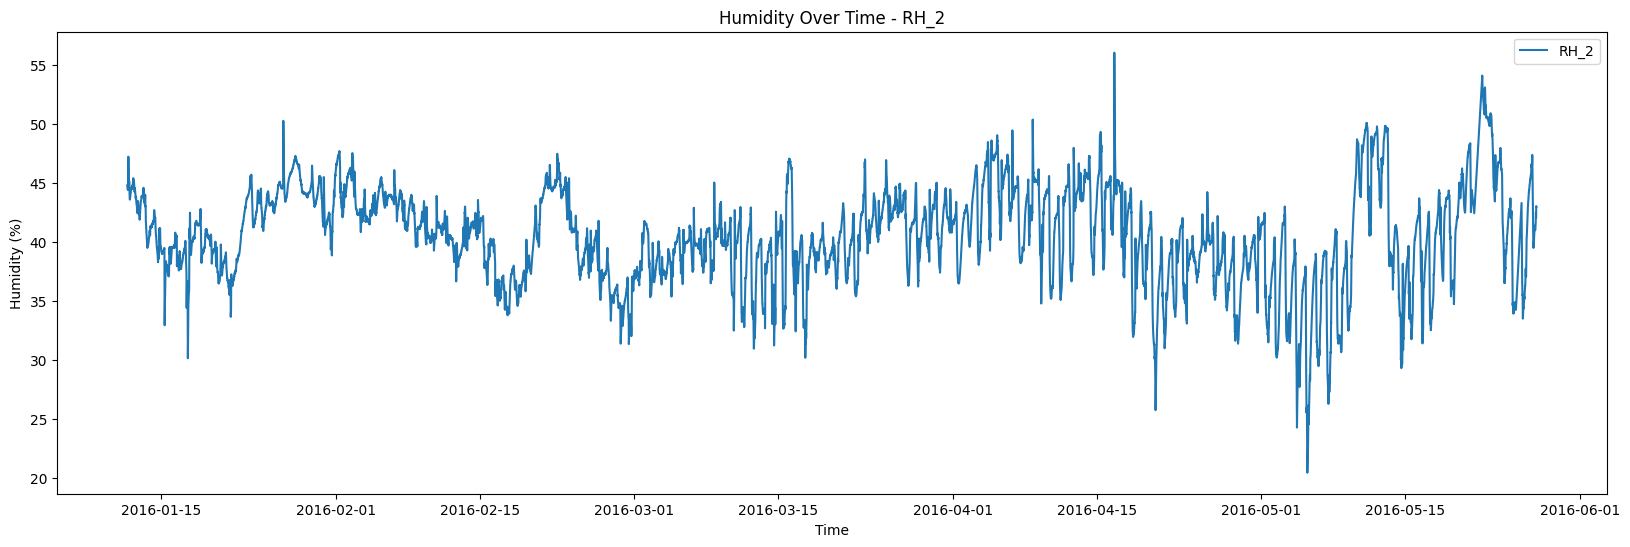

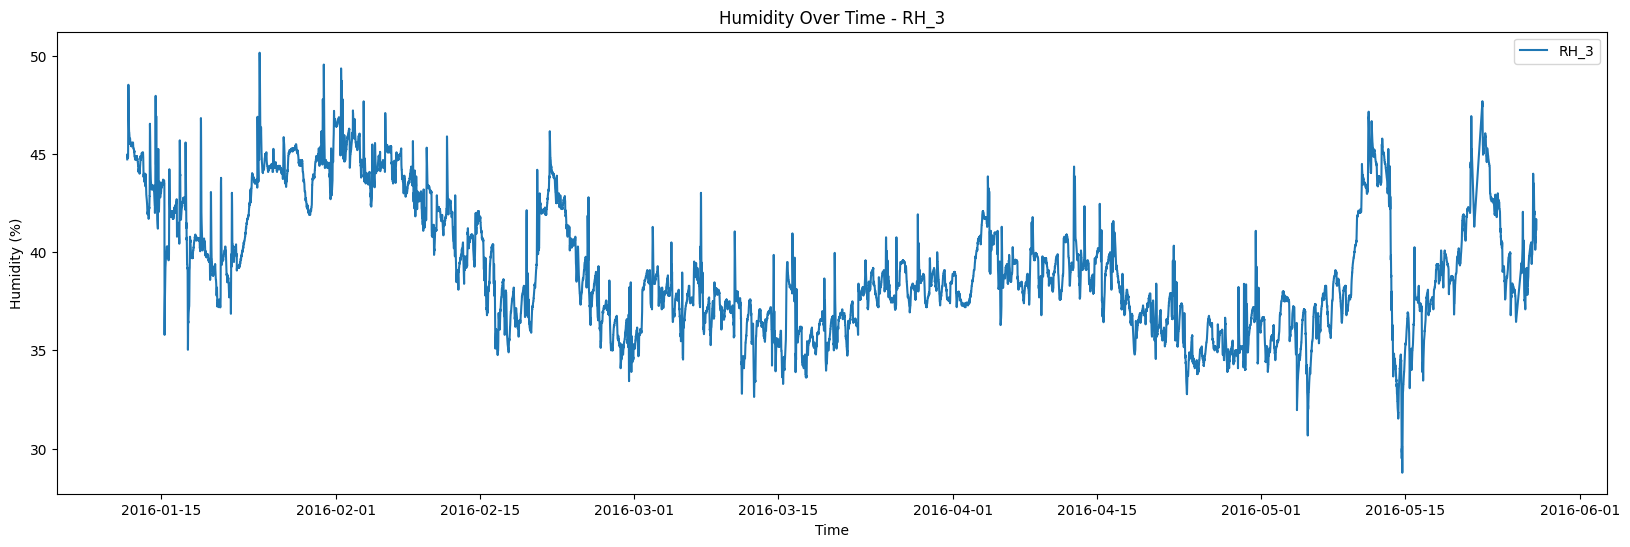

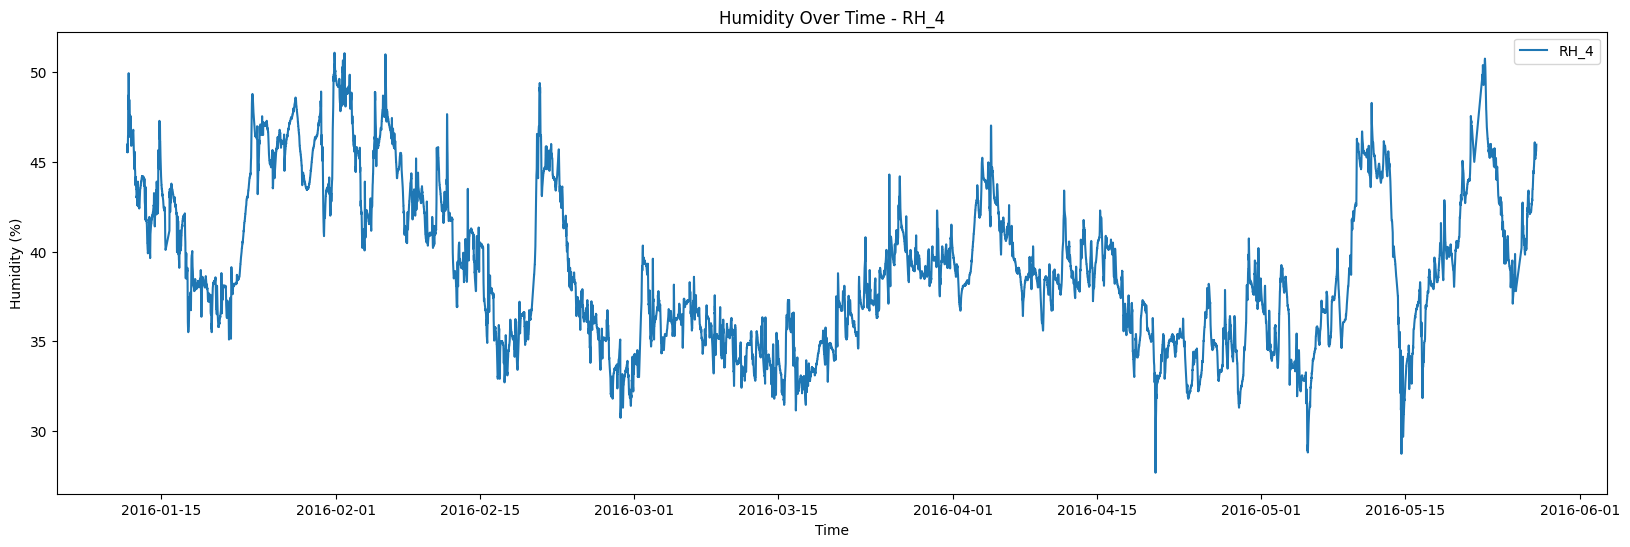

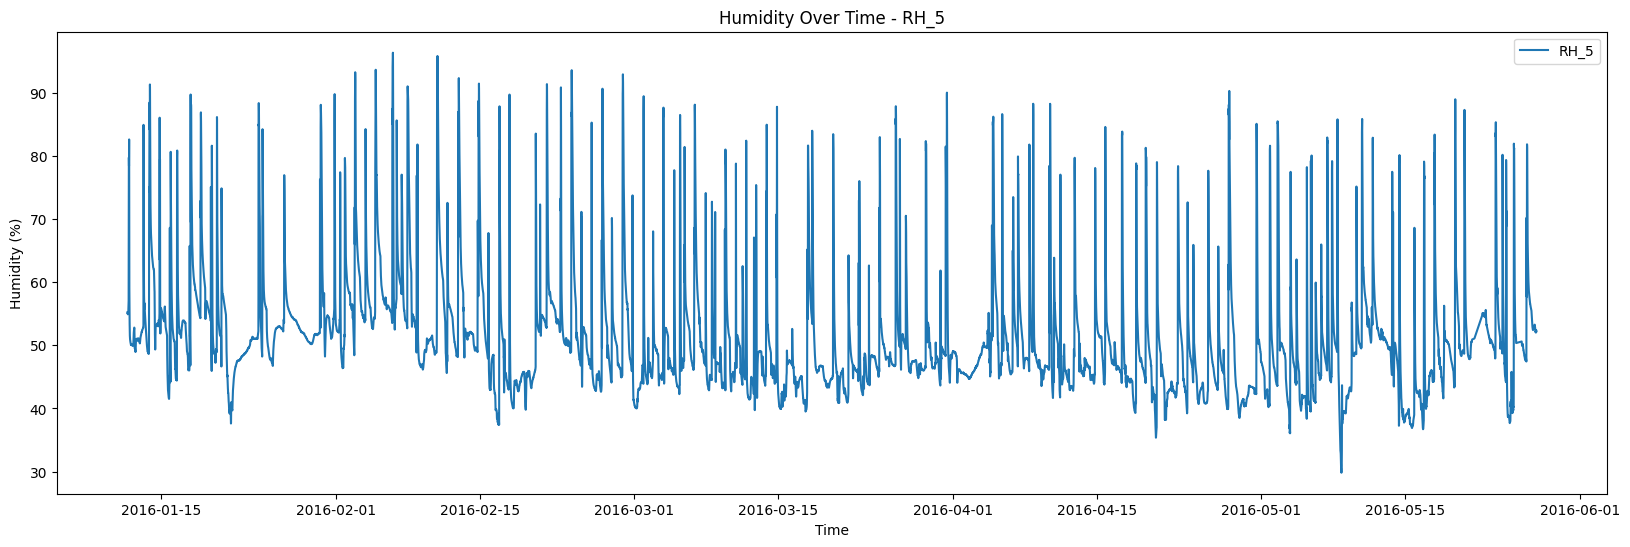

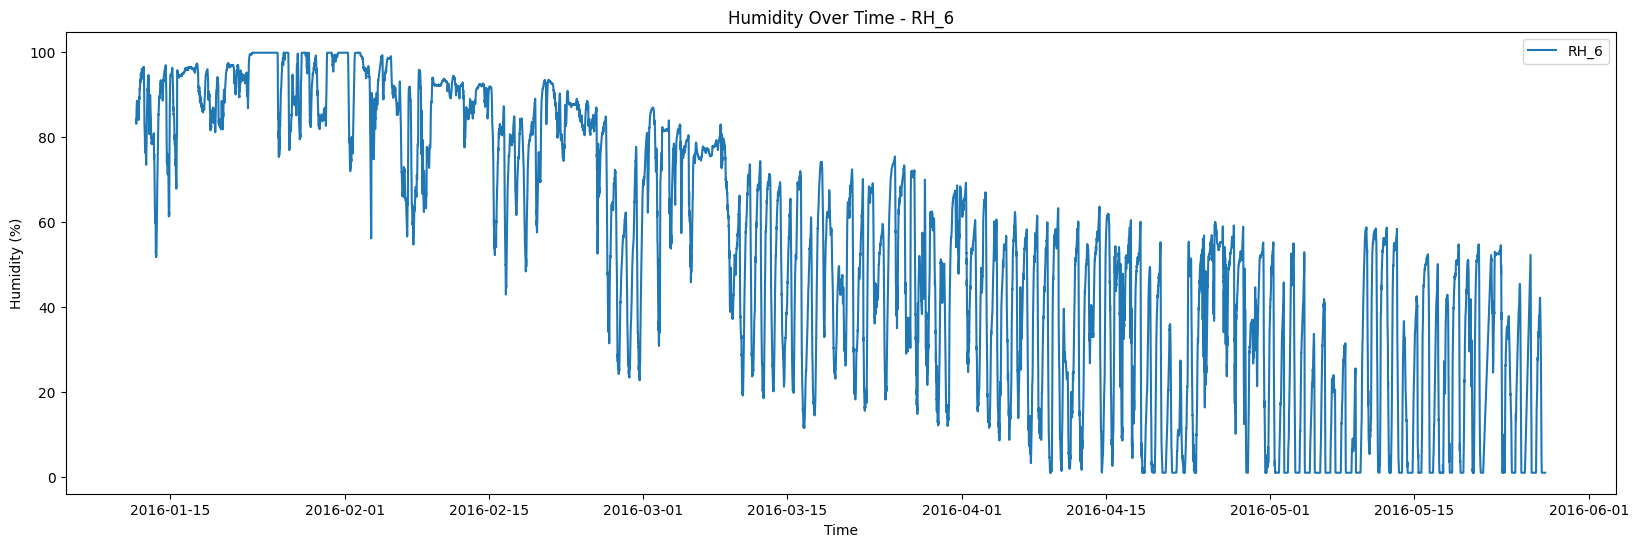

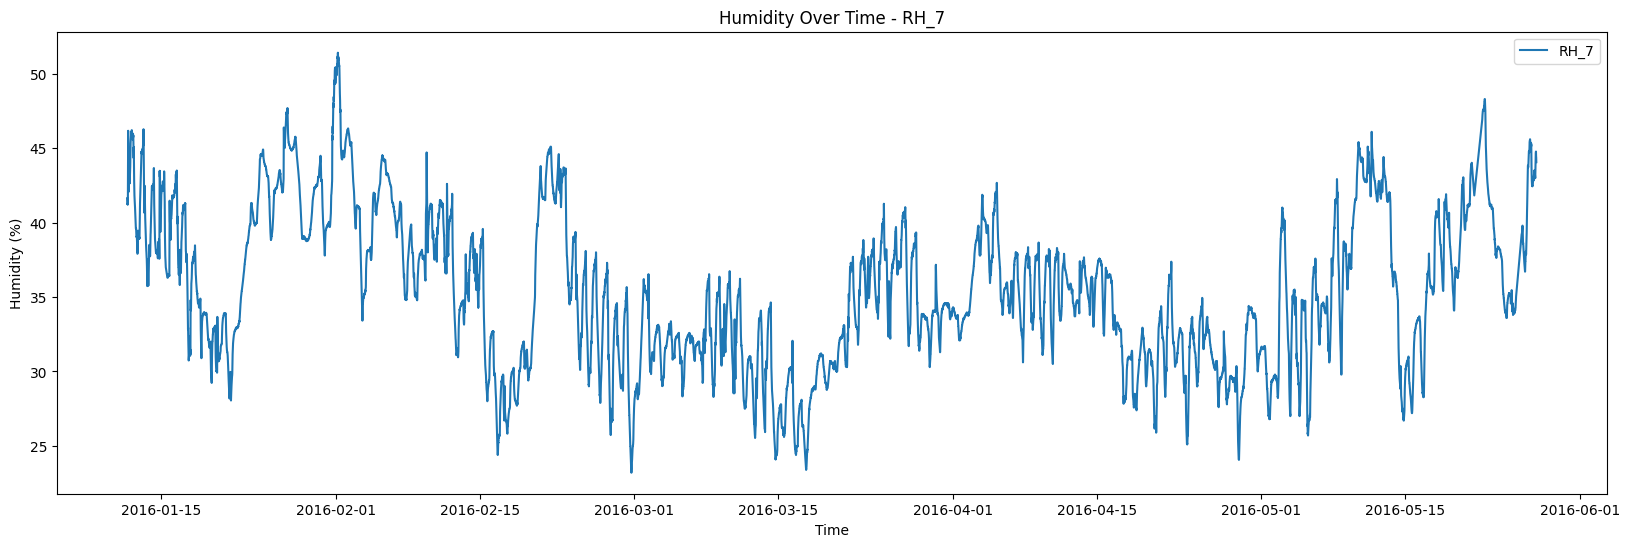

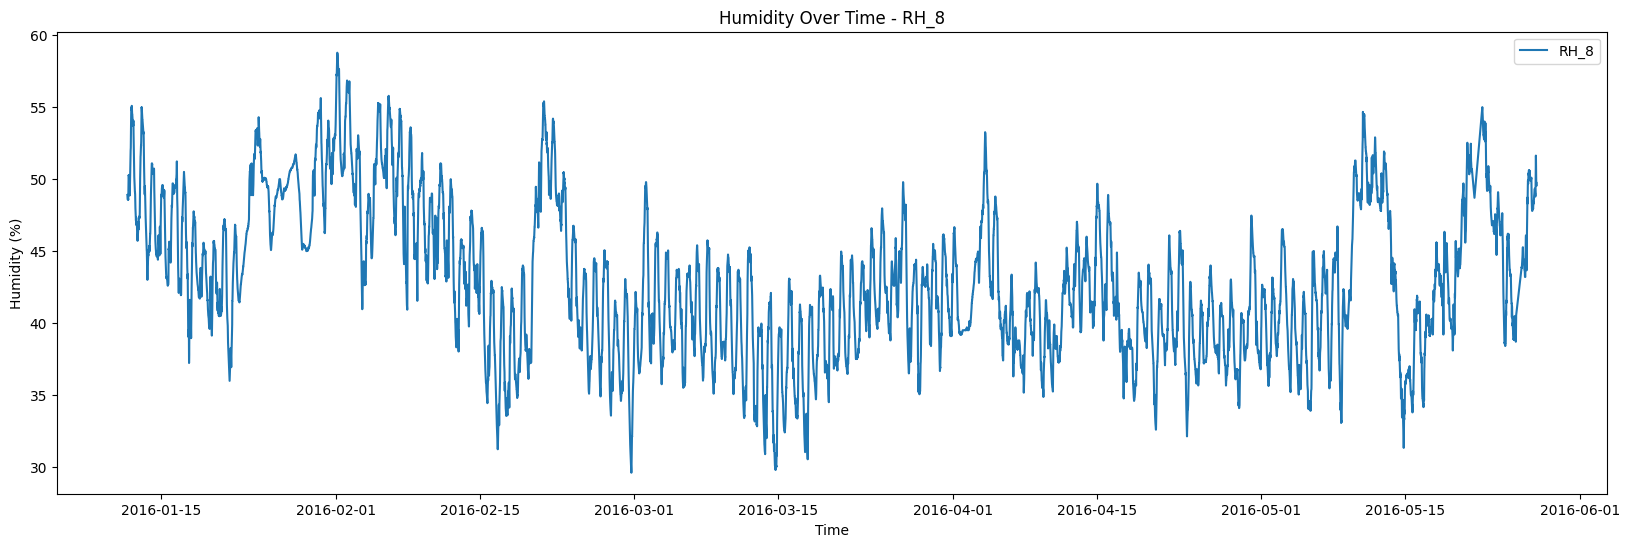

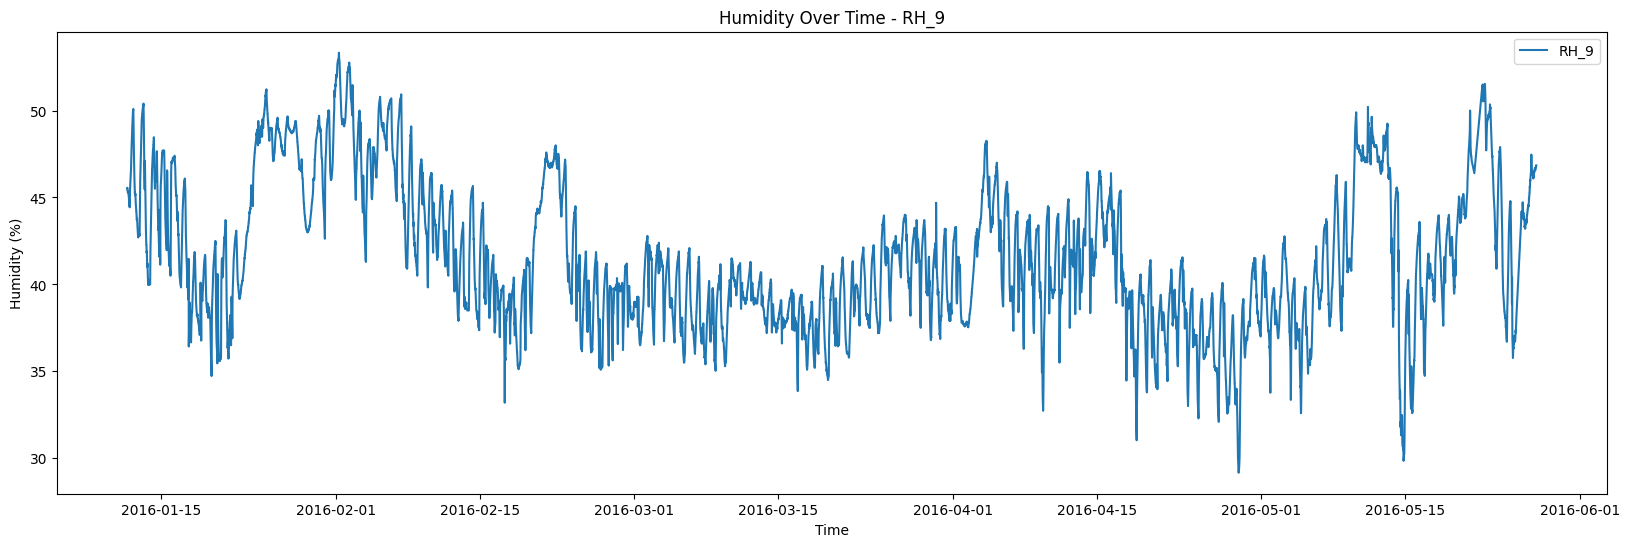

In [18]:
# Biểu đồ độ ẩm theo thời gian
humidity_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

for column in humidity_columns:
    plt.figure(figsize=(20, 6))
    plt.plot(df['date'], df[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Humidity (%)')
    plt.title(f'Humidity Over Time - {column}')
    plt.legend()
    plt.show()

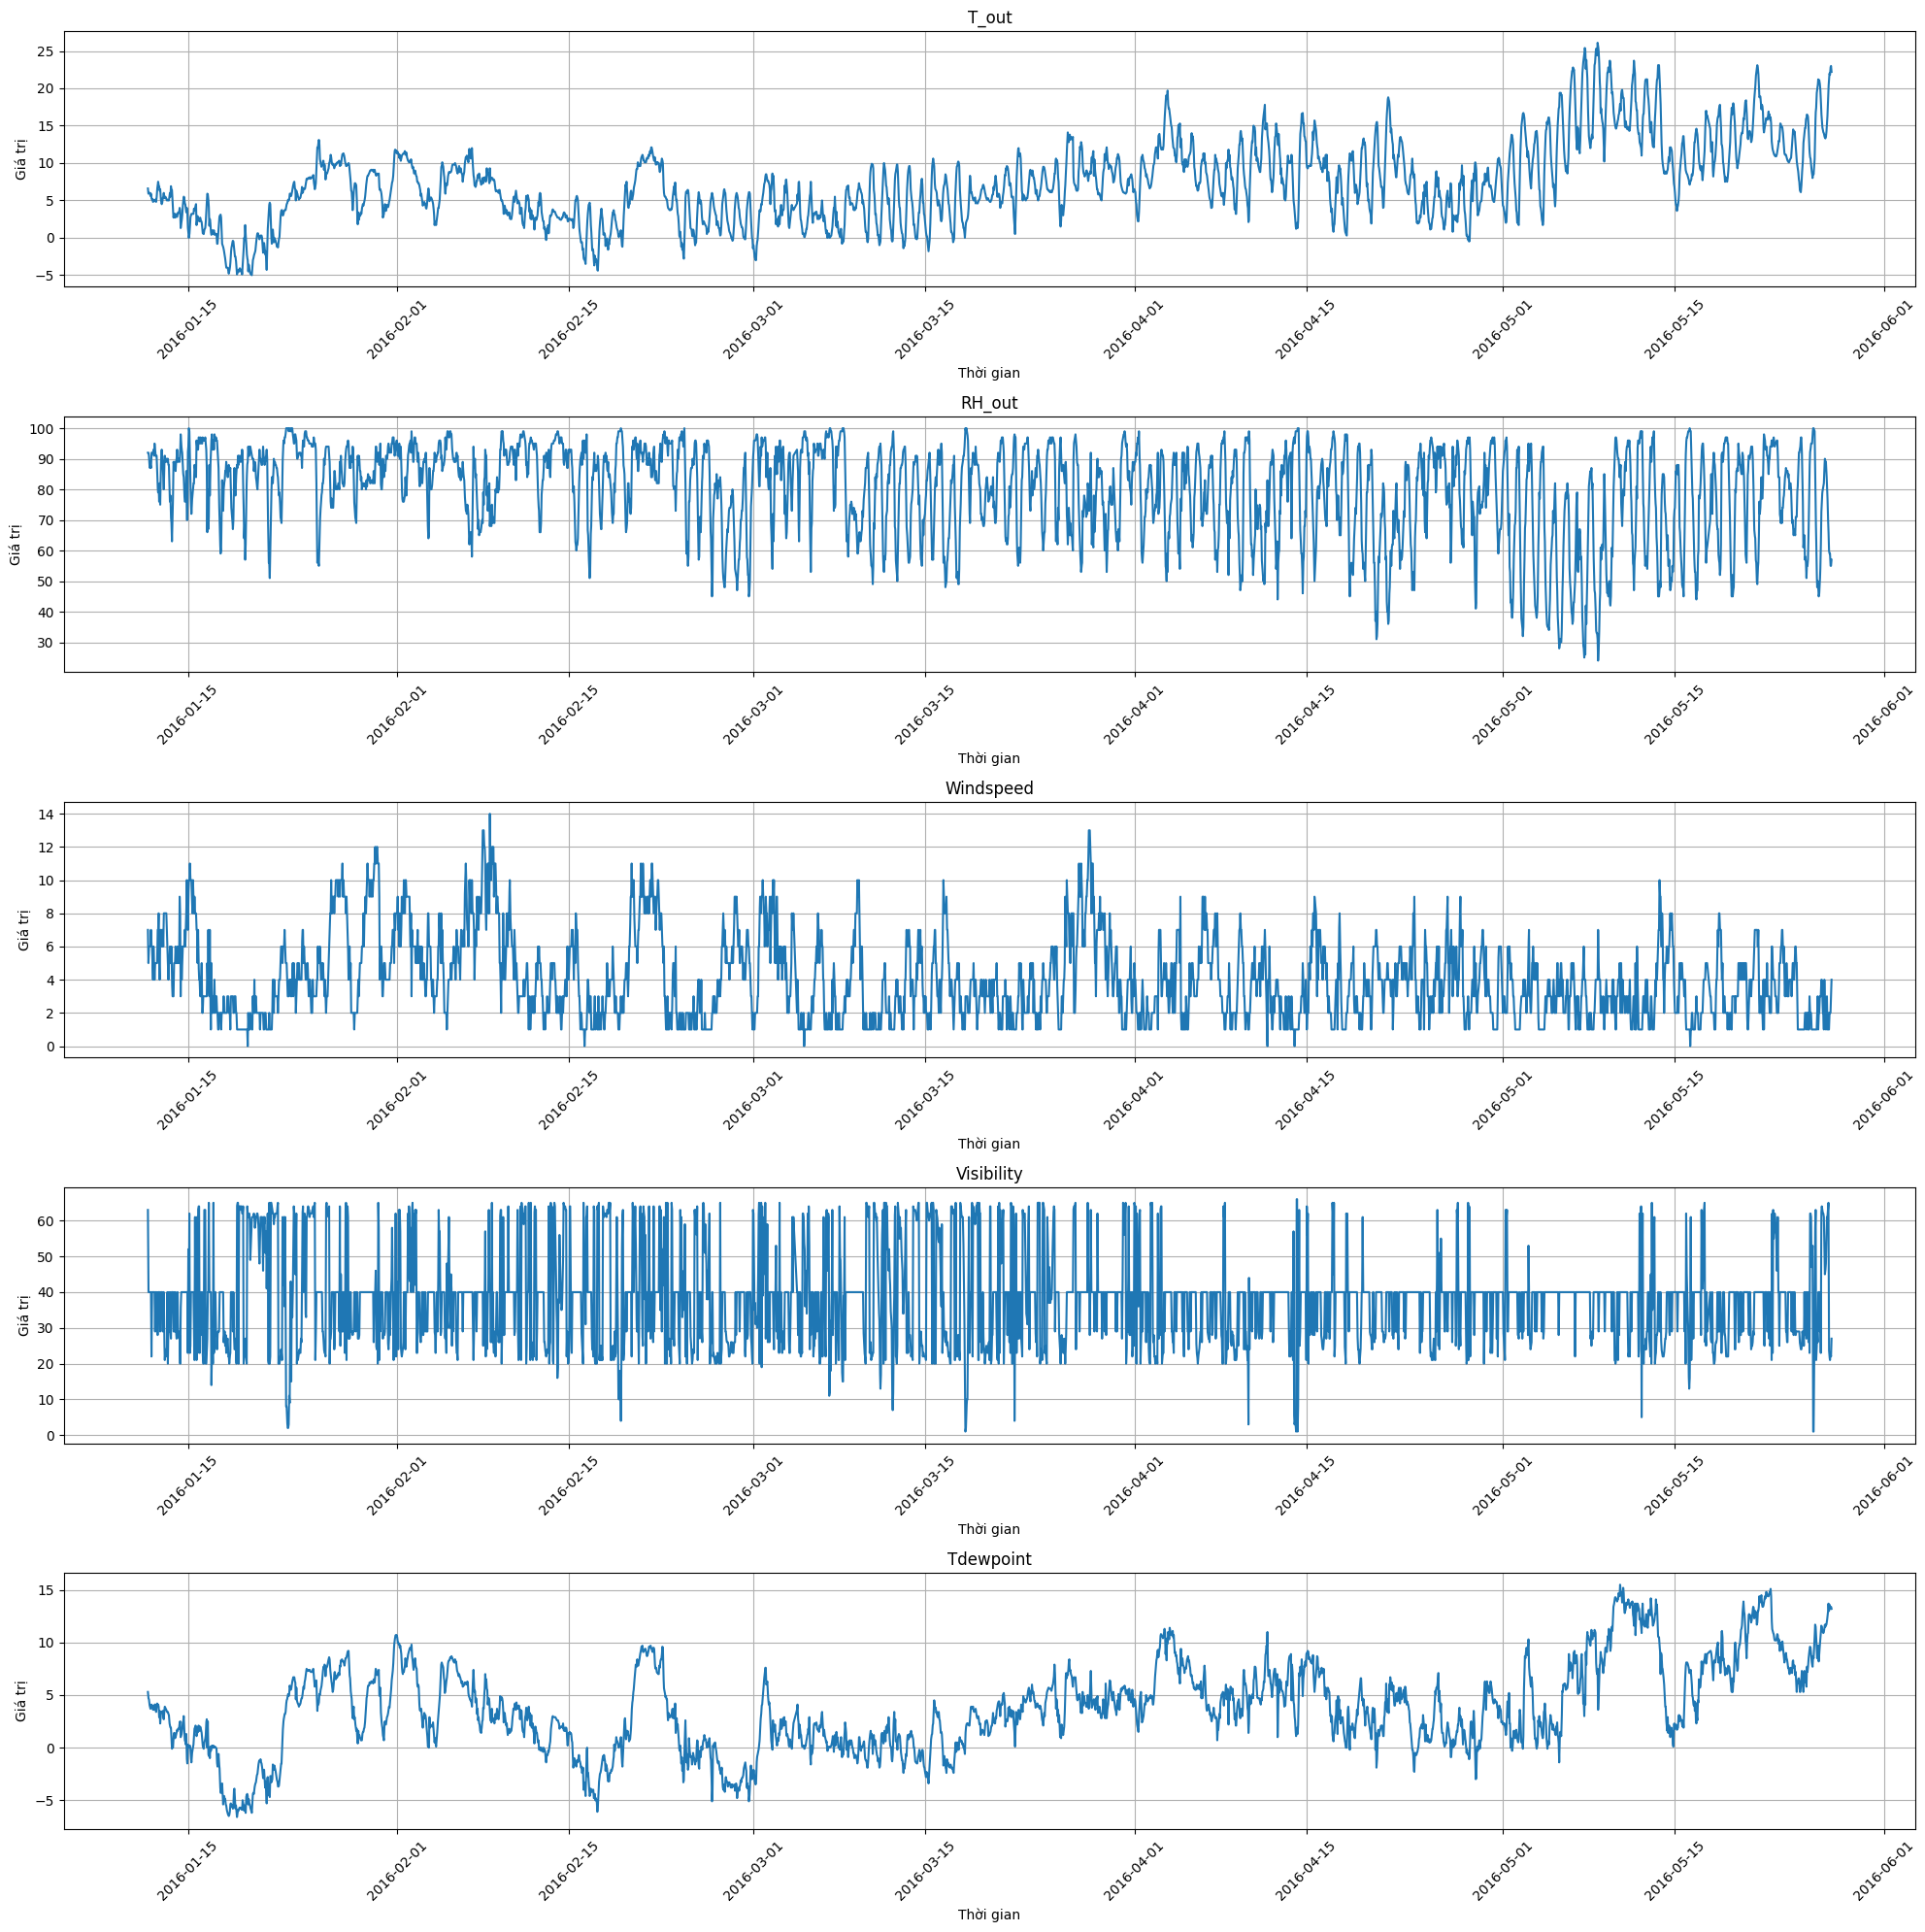

In [19]:
# Biểu đồ đường cho các features ngoài trời
weather_columns = ['T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
plt.figure(figsize=(20, 20))

for i, col in enumerate(weather_columns, 1):
    plt.subplot(len(weather_columns), 1, i)
    plt.plot(df['date'], df[col])
    plt.title(col)
    plt.xlabel('Thời gian')
    plt.ylabel('Giá trị')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

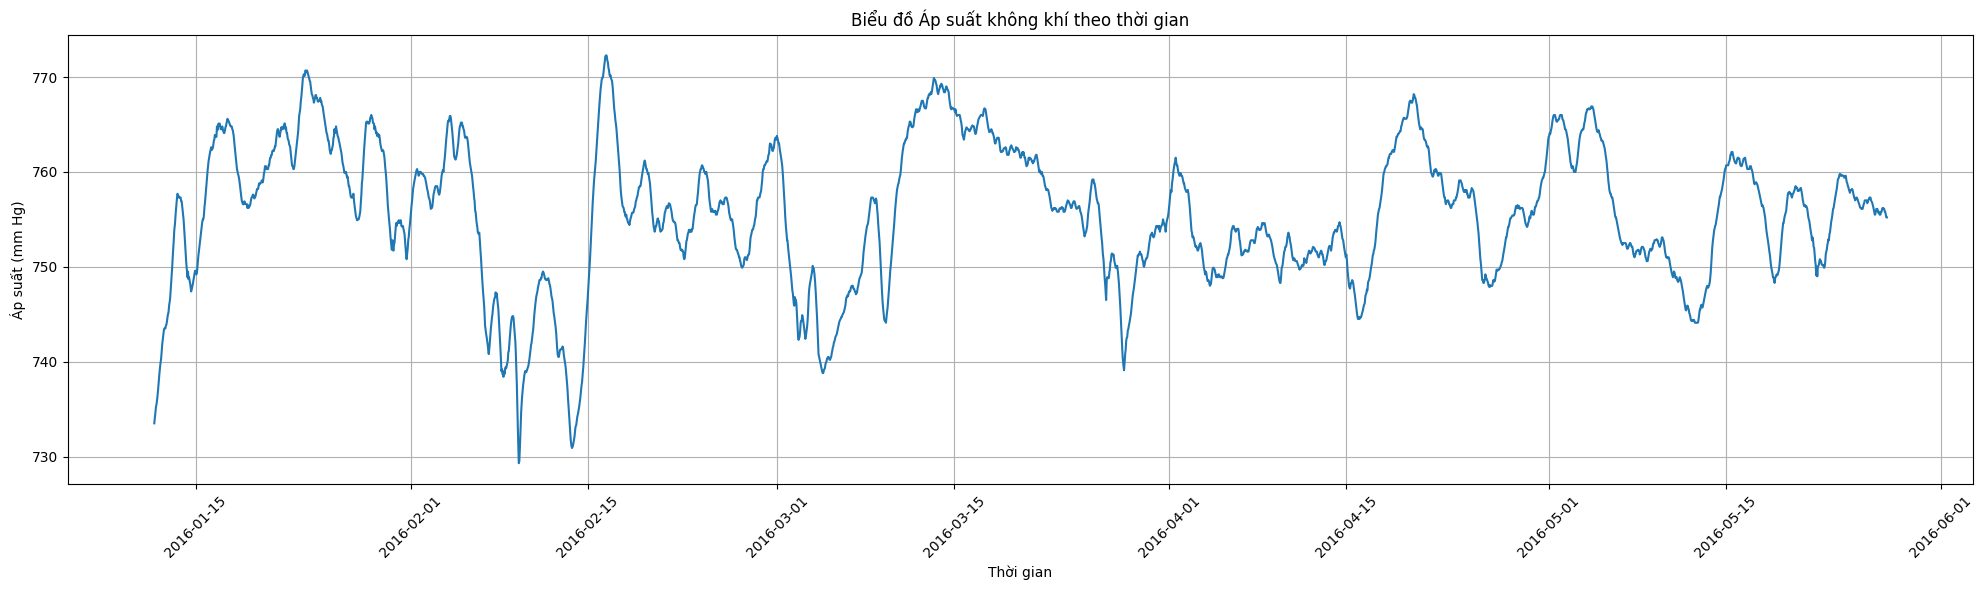

In [20]:
# Biểu đồ đường cho áp suất không khí theo thời gian
plt.figure(figsize=(20, 6))
plt.plot(df['date'], df['Press_mm_hg'])
plt.title('Biểu đồ Áp suất không khí theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Áp suất (mm Hg)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

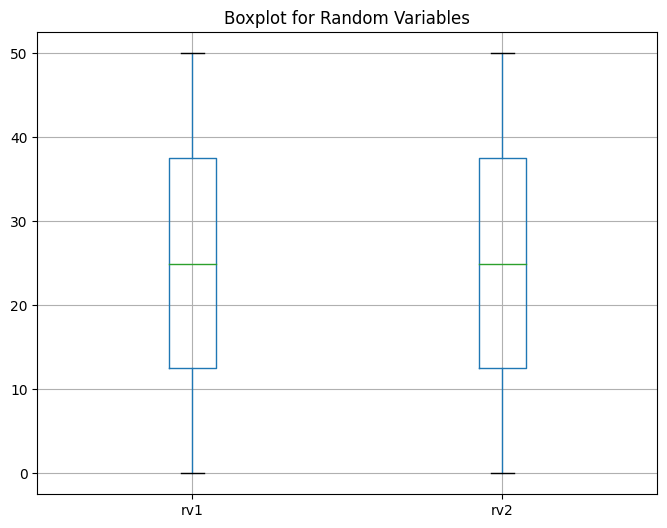

In [21]:
# Biểu đồ boxplot cho Random Variables (rv1 và rv2)
plt.figure(figsize=(8, 6))
df[['rv1', 'rv2']].boxplot()
plt.title('Boxplot for Random Variables')
plt.show()

# Prepare data

In [22]:
# Chia dữ liệu thành features (đặc trưng) và target (mục tiêu)
features = df.drop(columns=['date', 'Appliances', 'T_out'])  # Loại bỏ cột ngày và cột tiêu thụ năng lượng
target = df['Appliances']  # Cột tiêu thụ năng lượng

In [23]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Models

Linear regression

In [24]:
# Khởi tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán
predictions = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8329.861900159094
Root Mean Squared Error: 91.26807711439469
R-squared: 0.1676040697679385


GradientBoostingRegressor

In [25]:
# Khởi tạo mô hình Gradient Boosting Decision Tree
model = GradientBoostingRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán
predictions = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7306.328912739739
Root Mean Squared Error: 85.47706658946444
R-squared: 0.2698848402534446


Neural Network

In [26]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Xây dựng mô hình Neural Network
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)# Layer output không sử dụng activation function cho bài toán hồi quy
])
# nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# nn_model.add(Dense(32, activation='relu'))
# nn_model.add(Dense(1))  # Layer output không sử dụng activation function cho bài toán hồi quy

# Compile mô hình
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
predictions = nn_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Epoch 1/100
494/494 [==============================] - 5s 1ms/step - loss: 12594.3867
Epoch 2/100
494/494 [==============================] - 1s 1ms/step - loss: 9602.8311
Epoch 3/100
494/494 [==============================] - 1s 1ms/step - loss: 9165.7061
Epoch 4/100
494/494 [==============================] - 1s 1ms/step - loss: 8956.0342
Epoch 5/100
494/494 [==============================] - 1s 1ms/step - loss: 8826.7197
Epoch 6/100
494/494 [==============================] - 1s 1ms/step - loss: 8731.7891
Epoch 7/100
494/494 [==============================] - 1s 1ms/step - loss: 8636.8965
Epoch 8/100
494/494 [==============================] - 1s 2ms/step - loss: 8570.0576
Epoch 9/100
494/494 [==============================] - 1s 2ms/step - loss: 8508.3955
Epoch 10/100
494/494 [==============================] - 1s 1ms/step - loss: 8437.3594
Epoch 11/100
494/494 [==============================] - 1s 1ms/step - loss: 8376.2422
Epoch 12/100
494/494 [==============================] - 1s 1ms

In [27]:
# Lưu mô hình
nn_model.save('my_model.keras')